# Datern Summer Internship Dataset Analysis

## Finding our way around the data

The data is divided into 12 columns. The following description was concluded after data exploration, but I am including it here.

• ID: Unique numerical ID of the row. This is ambiguous and may be one of the following:

– Product-specific  ID:  most  intuitive  because  of  the  Unit  price  and  Quantity  rows.   However,  it  clashes  withPayment and Date/Time, which should be transaction-specific (not all customers will use the same paymenttype for one product and they will purchase at different times).

– Invoice ID: explains the Payment column, but does not explain Product Category, Unit price and Quantity,which should be product-specific (invoices usually include several products with different categories, unit pricesand quantities).

– Compound  ID:  explains  all  issues  at  the  cost  of  having  unknown  format  and  therefore  being  impossible  toanalyse unless further information is provided.  e.g.  vendorid-invoiceid-productid∗This is assumed to be the meaning of ID

• Branch:  [A, B, C]

• City:  [Manchester, Liverpool, Leeds]

– Maps 1-1 to Branch, so I will refer to them interchangeably from now on

– Manchester ≡ A

– Liverpool ≡ B

– Leeds ≡ C

• Member:  [Member, Normal]

– Also slightly ambiguous.  Assumed to be a company membership.

• Product Category:  Sector that distributes the product.  One of the following:

– Food and beverages

– Sports and travel

– Health and beauty

– Fashion accessories

– Electronic accessories

– Home and lifestyle

• Unit price:  unitary price for the product (assumed to be in GBP)

• Quantity:  number of products purchased

• VAT: VAT for the entire transaction (always 16.(6)% of Total)

• Total:  Total price of the transaction (Unit price * Quantity)

• Date

• Time

• Payment:  [Ewallet, Cash, Credit card]

• gross margin %:  Always 5.6

• Customer Satisfaction:  Assumed to be between 1-10.  Actual values 4-10

– A small number (39 for explore data) of the data points is Null.  It is an insignificant subset so it is removed.

– A small number (2 for explore data) of the data points are outliers.  These are also removed.

Importing useful libraries

In [42]:
import pandas as pd
import scipy.stats as scp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Reading the data into a dataframe

In [43]:
df = pd.read_csv("Datern-Summer-Course-Dataset.csv")
df.head()

,ID,Branch,City,Member,Product Category,Unit price,Quantity,VAT,Total,Date,Time,Payment,gross margin %,Customer Satisfaction
0,750-67-8428,A,Manchester,Member,Health and beauty,74.69,7,104.566,627.396,05/01/2019,13:08,Ewallet,5.6,9.1
1,226-31-3081,C,Leeds,Normal,Electronic accessories,15.28,5,15.280,91.680,08/03/2019,10:29,Cash,5.6,9.6
2,631-41-3108,A,Manchester,Normal,Home and lifestyle,46.33,7,64.862,389.172,03/03/2019,13:23,Credit card,5.6,7.4
3,123-19-1176,A,Manchester,Member,Health and beauty,58.22,8,93.152,558.912,27/01/2019,20:33,Ewallet,5.6,NaN
4,373-73-7910,A,Manchester,Normal,Sports and travel,86.31,7,120.834,725.004,08/02/2019,10:37,Ewallet,5.6,5.3


Exploring the structure

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1000 non-null   object 
 1   Branch                 1000 non-null   object 
 2   City                   1000 non-null   object 
 3   Member                 1000 non-null   object 
 4   Product Category       1000 non-null   object 
 5   Unit price             1000 non-null   float64
 6   Quantity               1000 non-null   int64  
 7   VAT                    1000 non-null   float64
 8   Total                  1000 non-null   float64
 9   Date                   1000 non-null   object 
 10  Time                   1000 non-null   object 
 11  Payment                1000 non-null   object 
 12  gross margin %         1000 non-null   float64
 13  Customer Satisfaction  898 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 78.2+ KB

Found some null values in the Customer Satisfaction field. Removing those!

In [45]:
df = df[df['Customer Satisfaction'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     898 non-null    object 
 1   Branch                 898 non-null    object 
 2   City                   898 non-null    object 
 3   Member                 898 non-null    object 
 4   Product Category       898 non-null    object 
 5   Unit price             898 non-null    float64
 6   Quantity               898 non-null    int64  
 7   VAT                    898 non-null    float64
 8   Total                  898 non-null    float64
 9   Date                   898 non-null    object 
 10  Time                   898 non-null    object 
 11  Payment                898 non-null    object 
 12  gross margin %         898 non-null    float64
 13  Customer Satisfaction  898 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 77.2+ KB


Reorganising the Date and Time columns

In [46]:
df['DateTime'] = df['Date'].str.cat(df['Time'], sep=" ")
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%d/%m/%Y %H:%M")

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

df.head()

,ID,Branch,City,Member,Product Category,Unit price,Quantity,VAT,Total,Date,Time,Payment,gross margin %,Customer Satisfaction,DateTime
0,750-67-8428,A,Manchester,Member,Health and beauty,74.69,7,104.566,627.396,2019-01-05,1900-01-01 13:08:00,Ewallet,5.6,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Leeds,Normal,Electronic accessories,15.28,5,15.280,91.680,2019-03-08,1900-01-01 10:29:00,Cash,5.6,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Manchester,Normal,Home and lifestyle,46.33,7,64.862,389.172,2019-03-03,1900-01-01 13:23:00,Credit card,5.6,7.4,2019-03-03 13:23:00
4,373-73-7910,A,Manchester,Normal,Sports and travel,86.31,7,120.834,725.004,2019-02-08,1900-01-01 10:37:00,Ewallet,5.6,5.3,2019-02-08 10:37:00
5,699-14-3026,C,Leeds,Normal,Electronic accessories,85.39,7,119.546,717.276,2019-03-25,1900-01-01 18:30:00,Ewallet,5.6,4.1,2019-03-25 18:30:00


Renaming columns for easier access

In [47]:
renamings = {'Product Category': 'Category', 
    'Customer Satisfaction': 'Satisfaction',
    'Unit price': 'Uprice'}
df = df.rename(columns=renamings)

df.head()

,ID,Branch,City,Member,Category,Uprice,Quantity,VAT,Total,Date,Time,Payment,gross margin %,Satisfaction,DateTime
0,750-67-8428,A,Manchester,Member,Health and beauty,74.69,7,104.566,627.396,2019-01-05,1900-01-01 13:08:00,Ewallet,5.6,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Leeds,Normal,Electronic accessories,15.28,5,15.280,91.680,2019-03-08,1900-01-01 10:29:00,Cash,5.6,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Manchester,Normal,Home and lifestyle,46.33,7,64.862,389.172,2019-03-03,1900-01-01 13:23:00,Credit card,5.6,7.4,2019-03-03 13:23:00
4,373-73-7910,A,Manchester,Normal,Sports and travel,86.31,7,120.834,725.004,2019-02-08,1900-01-01 10:37:00,Ewallet,5.6,5.3,2019-02-08 10:37:00
5,699-14-3026,C,Leeds,Normal,Electronic accessories,85.39,7,119.546,717.276,2019-03-25,1900-01-01 18:30:00,Ewallet,5.6,4.1,2019-03-25 18:30:00


Dividing the data for easier access

In [48]:
categories = pd.unique(df['Category'])
cities = pd.unique(df['City'])
branches = pd.unique(df['Branch']) # overlaps with city
payments = pd.unique(df['Payment'])
members = pd.unique(df['Member'])

dividers = [('Category', categories),('City', cities),('Payment', payments),('Member', members)]

datasets = {}
for name, separators in dividers:
    for separator in separators:
        datasets[separator] = df[df[name] == separator]

datasets['Member'].head()

,ID,Branch,City,Member,Category,Uprice,Quantity,VAT,Total,Date,Time,Payment,gross margin %,Satisfaction,DateTime
0,750-67-8428,A,Manchester,Member,Health and beauty,74.69,7,104.566,627.396,2019-01-05,1900-01-01 13:08:00,Ewallet,5.6,9.1,2019-01-05 13:08:00
6,355-53-5943,A,Manchester,Member,Electronic accessories,68.84,6,82.608,495.648,2019-02-25,1900-01-01 14:36:00,Ewallet,5.6,5.8,2019-02-25 14:36:00
8,665-32-9167,A,Manchester,Member,Health and beauty,36.26,2,14.504,87.024,2019-01-10,1900-01-01 17:15:00,Credit card,5.6,7.2,2019-01-10 17:15:00
9,692-92-5582,B,Liverpool,Member,Food and beverages,54.84,3,32.904,197.424,2019-02-20,1900-01-01 13:27:00,Credit card,5.6,5.9,2019-02-20 13:27:00
10,351-62-0822,B,Liverpool,Member,Fashion accessories,14.48,4,11.584,69.504,2019-02-06,1900-01-01 18:07:00,Ewallet,5.6,4.5,2019-02-06 18:07:00


## Data Analysis

### Overview of the numbers

In [49]:
df.Branch.value_counts()

A    309
C    299
B    290
Name: Branch, dtype: int64

In [50]:
df.City.value_counts()

Manchester    309
Leeds         299
Liverpool     290
Name: City, dtype: int64

In [51]:
df.Member.value_counts()

Member    450
Normal    448
Name: Member, dtype: int64

In [52]:
df.Category.value_counts()

Food and beverages        160
Fashion accessories       157
Sports and travel         151
Electronic accessories    149
Home and lifestyle        144
Health and beauty         137
Name: Category, dtype: int64

In [53]:
df.Payment.value_counts()

Cash           314
Ewallet        307
Credit card    277
Name: Payment, dtype: int64

In [54]:
df['gross margin %'].value_counts()

5.6    898
Name: gross margin %, dtype: int64

### Preliminary Visualisation

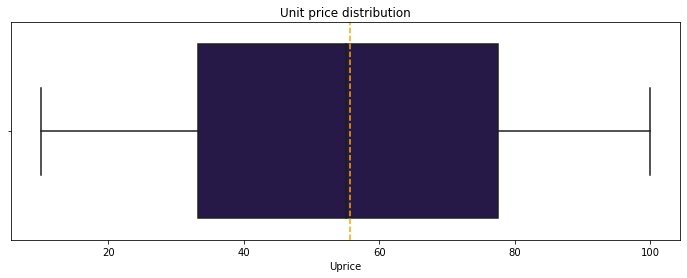

In [55]:
sns.set_palette('magma')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df.Uprice).set_title("Unit price distribution")

plt.axvline(df.Uprice.mean(), color='orange', linestyle='--')

Unit price seems like a normal distribution.

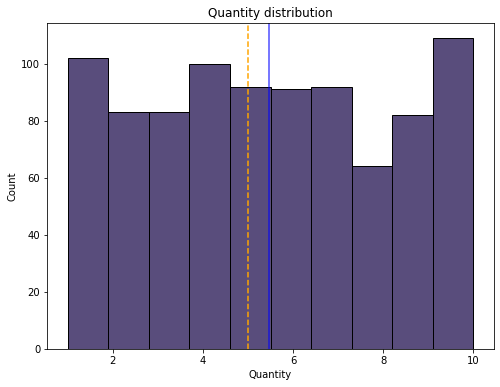

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df.Quantity, bins=10).set_title("Quantity distribution")

plt.axvline(df.Quantity.mean(), color='blue', linestyle='-', alpha=0.7)
plt.axvline(df.Quantity.median(), color='orange', linestyle='--')

Quantity distribution is slightly skewed to the left, but looks fairly uniform.

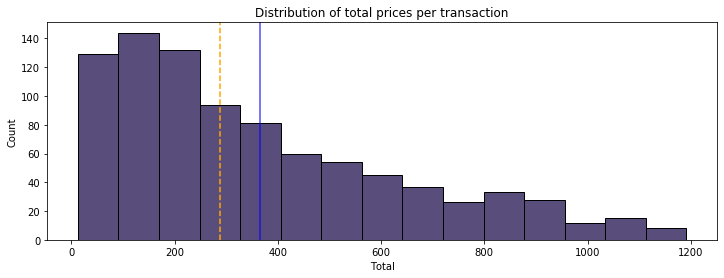

In [57]:
plt.figure(figsize=(12, 4))
sns.histplot(df.Total).set_title('Distribution of total prices per transaction')

plt.axvline(df.Total.mean(), color='blue', linestyle='-', alpha=0.7)
plt.axvline(df.Total.median(), color='orange', linestyle='--')

Total distribution presents an expected decline towards larger values.

(array([737060., 737074., 737091., 737105., 737119., 737133., 737150.]),
 <a list of 7 Text xticklabel objects>)

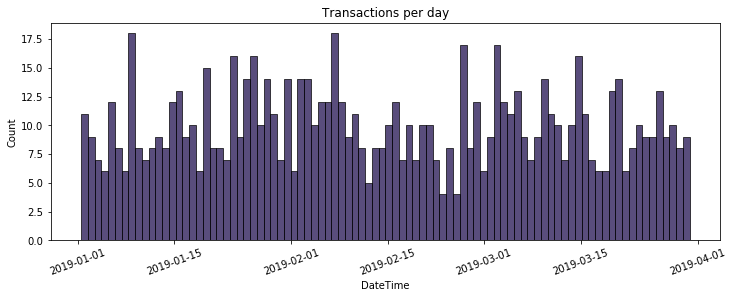

In [58]:
plt.figure(figsize=(12, 4))
sns.histplot(df.DateTime, bins=90).set_title("Transactions per day")
plt.xticks(rotation=20)

There appear to be peak days for purchases.

(array([737060., 737074., 737091., 737105., 737119., 737133., 737150.]),
 <a list of 7 Text xticklabel objects>)

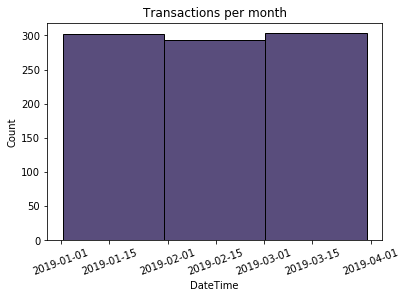

In [59]:
sns.histplot(df.DateTime, bins=3).set_title('Transactions per month')
plt.xticks(rotation=20)

The differences in transactions between months are insignificant.

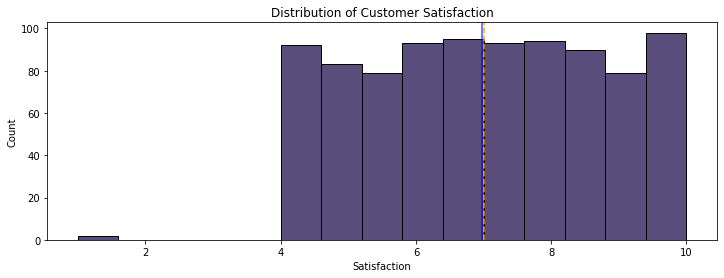

In [60]:
plt.figure(figsize=(12, 4))
sns.histplot(df.Satisfaction).set_title("Distribution of Customer Satisfaction")

plt.axvline(df.Satisfaction.mean(), color='blue', linestyle='-', alpha=0.7)
plt.axvline(df.Satisfaction.median(), color='orange', linestyle='--')

Outliers appear in the satisfaction distribution. Let's remove them.

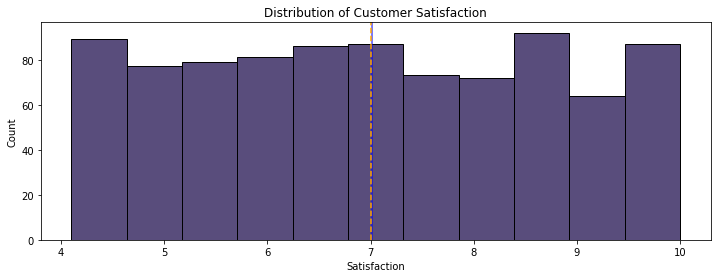

In [61]:
df = df[df.Satisfaction > 4]

plt.figure(figsize=(12, 4))
sns.histplot(df.Satisfaction).set_title("Distribution of Customer Satisfaction")

plt.axvline(df.Satisfaction.mean(), color='blue', linestyle='-', alpha=0.7)
plt.axvline(df.Satisfaction.median(), color='orange', linestyle='--')

Now the distribution appears fairly uniform.

### Now that we know the general look of the data, let's test a few hypotheses by two metrics at a time

Do the branches have preferences in terms of payment method?

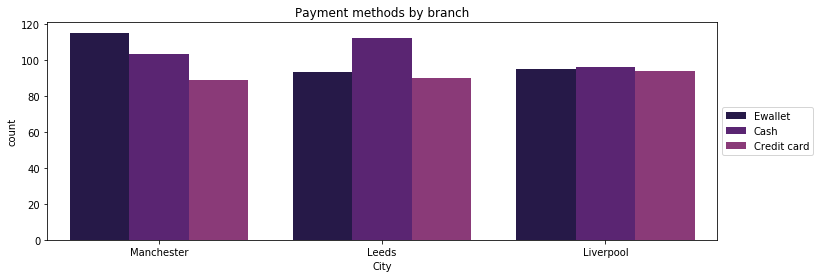

In [62]:
plt.figure(figsize=(12, 4))
sns.countplot(x=df.City, hue=df.Payment).set_title('Payment methods by branch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Manchester and Leeds prefer Ewallet and Cash respectively. The payment types hold curiously equal shares in the distribution.

Do some product categories demand specific payment methods?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

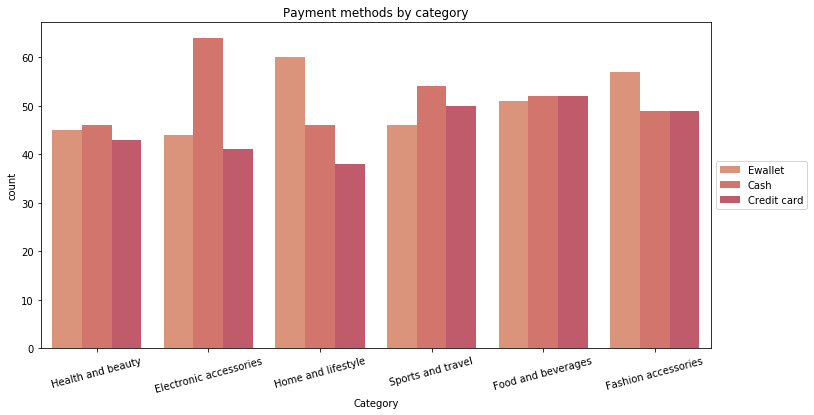

In [63]:
sns.set_palette('flare')
plt.figure(figsize=(12, 6))
sns.countplot(x=df.Category, hue=df.Payment).set_title('Payment methods by category')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=15)

Some trends are clearly visible e.g. Cash payments for Electronic accessories or Ewallet for Home and lifestyle

Are some categories bought more often than others?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

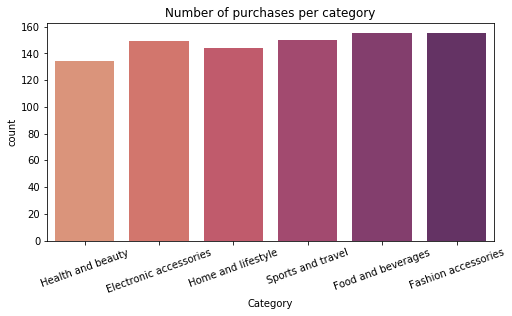

In [64]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df.Category).set_title('Number of purchases per category')
plt.xticks(rotation=20)

While most values are similar, there is a significant difference in number of occurences between Health & Beauty and Fashion Accessories.

Therefore, comparing categories in terms of spending and profit might not yield realistic results (though we will attempt this anyway).

Are there significant differences between the total revenue of each category?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

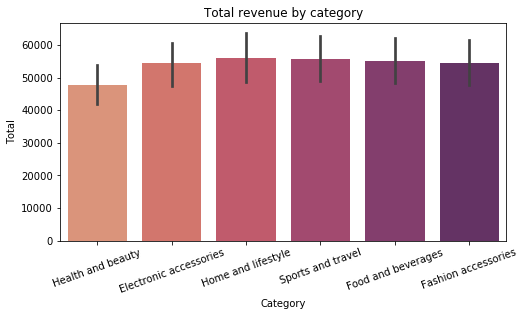

In [65]:
plt.figure(figsize=(8, 4))
sns.barplot(df.Category, df.Total, estimator=np.sum).set_title('Total revenue by category')
plt.xticks(rotation=20)

While Fashion Accessories is no longer at the top of the chart, there is a significant difference between Health & Beauty and the rest of the categories, which suggests that it is not a great choice for development. However, the standard errors in the mean suggest that Health & Beauty should not be ruled out entirely.

Therefore, let's compare whether some trends can be seen between branches:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

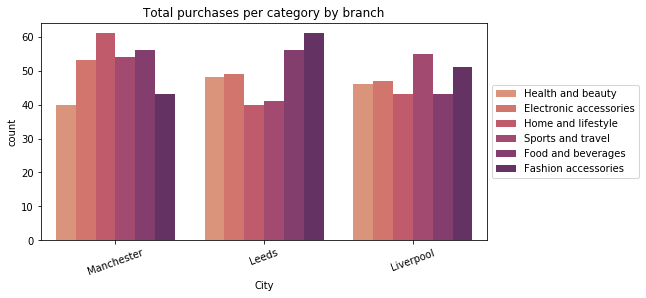

In [66]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df.City, hue=df.Category).set_title('Total purchases per category by branch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=20)

This plot gives some regional suggestions for development. Home & Lifestyle thrives best in Manchester, while Fashion Accessories fare best in Leeds. Liverpool is not as clear a winner, but it has the best potential for development in Sports & Travel

Do different branches have different membership rates?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


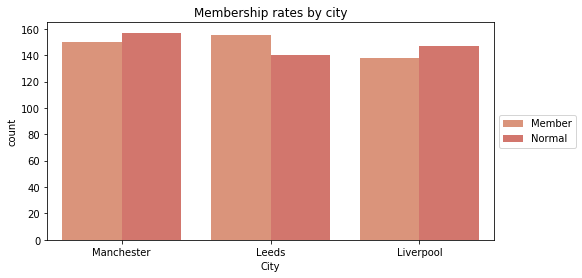

In [67]:
plt.figure(figsize=(8, 4))
sns.countplot(df.City, hue=df.Member).set_title('Membership rates by city')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

These membership services are oddly successful.

Do members and non-members buy different things?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


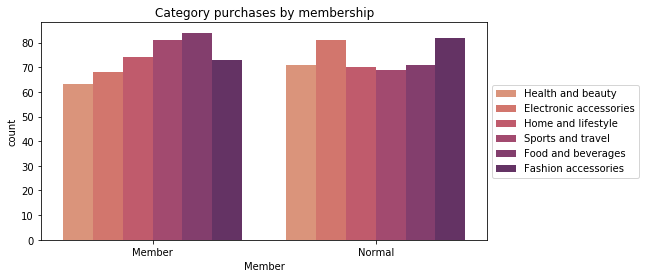

In [68]:
plt.figure(figsize=(8, 4))
sns.countplot(df.Member, hue=df.Category).set_title('Category purchases by membership')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

It appears that members buy more Food & Beverages and Sports & Travel, whereas non-members buy more Eletronic Accessories and Fashion Accessories.

Do members and non-members use different payment methods?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


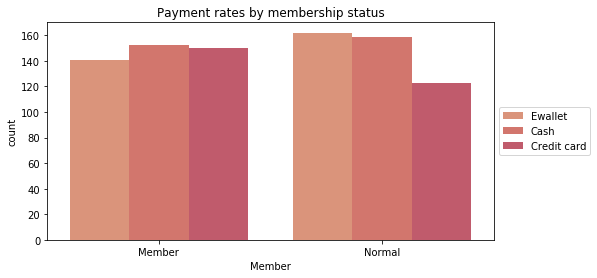

In [69]:
plt.figure(figsize=(8, 4))
sns.countplot(df.Member, hue=df.Payment).set_title('Payment rates by membership status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

There is a clear drop in Credit Card payments for non-members.

Do categories have significantly different mean unit prices?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

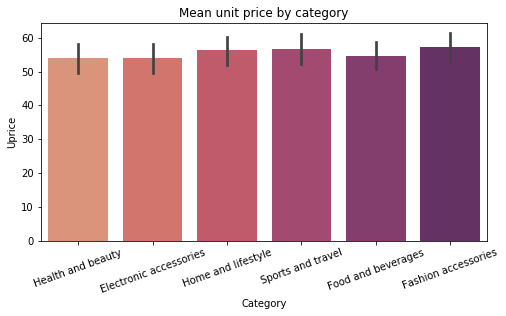

In [70]:
plt.figure(figsize=(8, 4))
sns.barplot(df.Category, df.Uprice).set_title('Mean unit price by category')
plt.xticks(rotation=20)

The differences are not significant.

Do people use different purchase methods depending on the unit price?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean unit price by payment method')

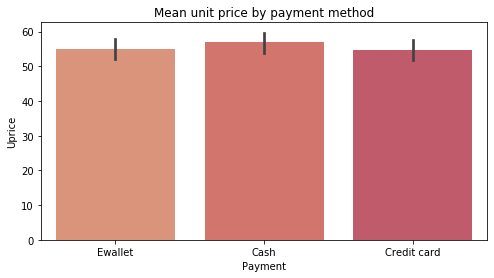

In [71]:
plt.figure(figsize=(8, 4))
sns.barplot(df.Payment, df.Uprice).set_title('Mean unit price by payment method')

Another surprise - Credit Card mean is lower than that of Cash.

Is there a correlation between the unit price and customer satisfaction?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation between unit price and satisfaction')

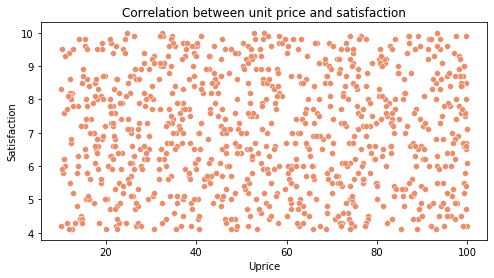

In [72]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df.Uprice, df.Satisfaction).set_title('Correlation between unit price and satisfaction')

There appears not to be any link between unit price and satisfaction.

Is there a link between unit price and quantity bought?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation between unit price and quantity')

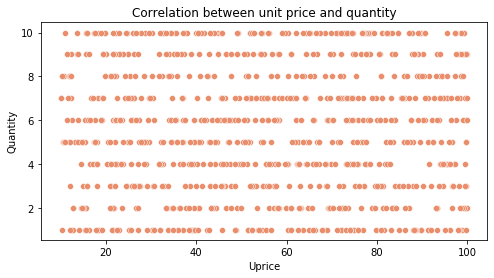

In [73]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df.Uprice, df.Quantity).set_title('Correlation between unit price and quantity')

Very surprisingly, there is no visible correlation between unit price and quantity. (the plot looks odd because Quantity has integer values within a much smaller range)

Do some categories have higher mean quantity sold?

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

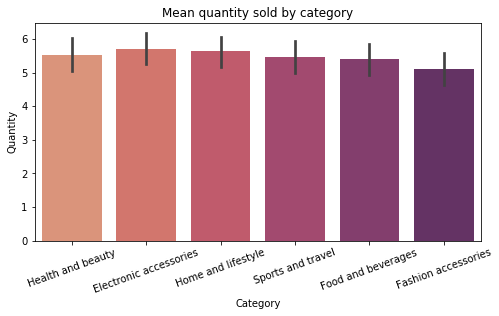

In [74]:
plt.figure(figsize=(8, 4))
sns.barplot(df.Category, df.Quantity).set_title('Mean quantity sold by category')
plt.xticks(rotation=20)

Again, no significant differences.

### Final steps

Comparing purchases between branches:

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Spending distributions by branch')

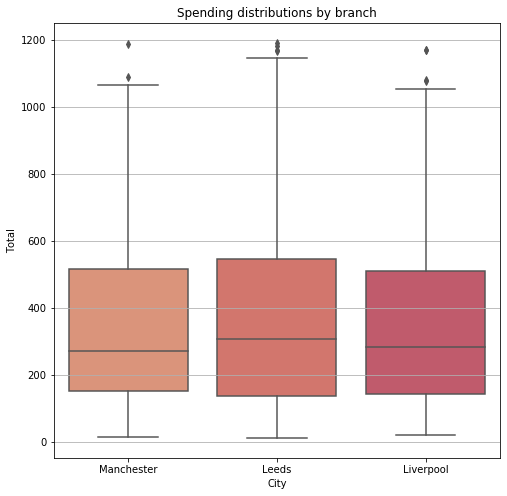

In [75]:
plt.figure(figsize=(8, 8))
plt.grid()
sns.boxplot(df.City, df.Total).set_title('Spending distributions by branch')

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total spending by branch')

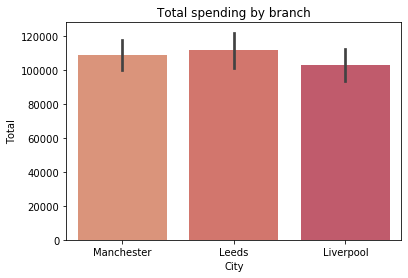

In [76]:
plt.figure(figsize=(6, 4))
sns.barplot(df.City, df.Total, estimator=np.sum).set_title('Total spending by branch')

The distributions are fairly close to each other.

Plotting some time-variable data:

In [77]:
days = df[['DateTime', 'Total']]
days['Count'] = [1] * len(days)
days = days.groupby(days.DateTime.dt.day_name()).sum().reset_index()
d = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days.DateTime = pd.Categorical(days.DateTime, categories=d)
days = days.sort_values('DateTime')
days.head()

<ipython-input-77-bebad87cf796>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days['Count'] = [1] * len(days)


,DateTime,Total,Count
1,Monday,39702.228,116
5,Tuesday,49999.416,136
6,Wednesday,43889.304,132
4,Thursday,47290.764,124
0,Friday,43670.712,120


C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of purchases per weekday')

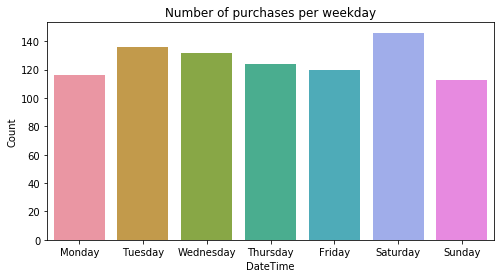

In [78]:
sns.set_palette('viridis')
plt.figure(figsize=(8,4))
sns.barplot(days.DateTime, days.Count).set_title('Number of purchases per weekday')

The peak day appears to be Saturday, with Tuesday coming up second.

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total spent per weekday')

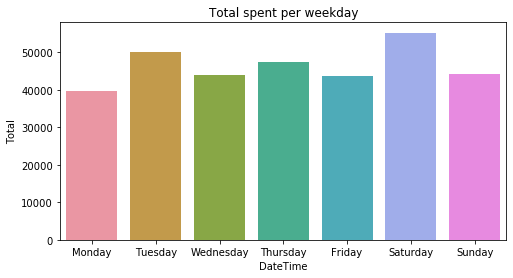

In [79]:
plt.figure(figsize=(8, 4))
sns.barplot(days.DateTime, days.Total).set_title('Total spent per weekday')

With totals, Saturday is confirmed to be the day that is both most shopping-intensive for customers and most profitable for the vendor.

In [80]:
hours = df[['DateTime', 'Total']]
hours['Mean'] = hours['Total']
hours['Count'] = [1] * len(hours)

hours = hours.groupby(hours.DateTime.dt.hour).sum().reset_index()
hours.head()

<ipython-input-80-bf58402fc338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hours['Mean'] = hours['Total']
<ipython-input-80-bf58402fc338>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hours['Count'] = [1] * len(hours)


,DateTime,Total,Mean,Count
0,10,33843.144,33843.144,94
1,11,31547.220,31547.220,80
2,12,26276.904,26276.904,79
3,13,36247.320,36247.320,93
4,14,28758.768,28758.768,74


C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of purchases per hour')

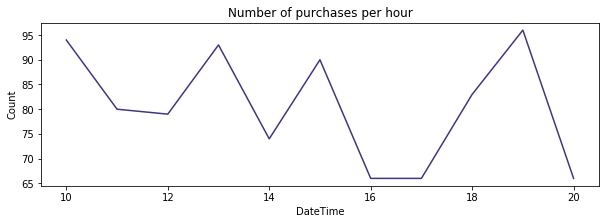

In [81]:
plt.figure(figsize=(10, 3))
sns.lineplot(hours.DateTime, hours.Count).set_title('Number of purchases per hour')

Looking for 'rush hour', another odd trend emerges. There are two peak values, one at 13 and one at 19.

C:\Users\Theo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total spent per hour')

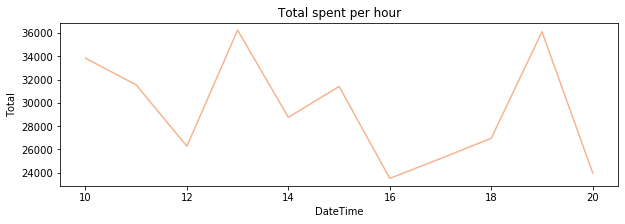

In [82]:
sns.set_palette('rocket_r')
plt.figure(figsize=(10, 3))
sns.lineplot(hours.DateTime, hours.Total).set_title('Total spent per hour')

When calculating the total revenue, the data solidifies as bimodal. There is one rush hour at 13, and another at 17.

## Wrap-up

There are some useful trends in the data, such as:

1. Which product category is 'best for business'? Manchester: Home & Lifestyle; Leeds: Fashion Accessories; Liverpool: Sports & Travel.

2. What is the most productive day of the week? Saturday.

3. Which are the 'rush hours' for the store? 13:00 and 17:00.

However, the more I explore it, the more oddities arise:

1. Why do about 50% of the customers hold memberships?

2. Why are cash payments on average more expensive than card payments?

3. Why don't unit price and quantity have a negative correlation?

4. Why are Food & Beverages bought in quantities as large as Electronic Accessories, about as often and with the same prices?

These questions lead me to the conclusion that the dataset... may not be that of a real store.